#Computer Vision Project

#PART-A

• DOMAIN: Botanical Research

• CONTEXT: University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at 
various stages of growth. They already have have invested on curating sample images. They require an automation which can create a 
classifier capable of determining a plant's species from a photo. 

• DATA DESCRIPTION: The dataset comprises of images from 12 plant species. 
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.

• PROJECT OBJECTIVE: To create a classifier capable of determining a plant's species from a photo

In [1]:
%tensorflow_version 2.x
import os
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Import and Understand the data [12 Marks]


In [3]:
os.chdir ('/content/drive/MyDrive/')

In [4]:
!ls

 17flowers		   Part-1Signal.csv
'Colab Notebooks'	   plant-seedlings-classification
'JJ Resume.pdf'		   plant-seedlings-classification.zip
'Jyostna_Resume (1).doc'   Prediction+-+Flower.jpg
 __MACOSX		  'Resume -Jyostna J.pdf'


A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]
Hint: You can extract it Manually by losing 2 mark

Set the appropriate path for the datsaet zip provided

In [5]:
images_path = "/content/drive/MyDrive/plant-seedlings-classification.zip"

**Extracting the dataset.zip to the present working directory**

In [6]:
from zipfile import ZipFile
with ZipFile(images_path, 'r') as zip:
  zip.extractall()

In [7]:
!ls

 17flowers		   Part-1Signal.csv
'Colab Notebooks'	   plant-seedlings-classification
'JJ Resume.pdf'		   plant-seedlings-classification.zip
'Jyostna_Resume (1).doc'   Prediction+-+Flower.jpg
 __MACOSX		  'Resume -Jyostna J.pdf'


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import os
print(os.listdir("/content/drive/MyDrive/plant-seedlings-classification"))

['.DS_Store', 'train']


In [10]:
Classes = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
NUM_Classes = len(Classes)

In [11]:
#SAMPLE_PER_CATEGORY = 200
SEED = 42
main_dir = '/content/drive/MyDrive/plant-seedlings-classification/'
train_dir = os.path.join(main_dir, 'train')

In [12]:
labels = sorted(os.listdir(train_dir))
print(labels)

['.DS_Store', 'Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [13]:
for Class in Classes:
    print('{} {} images'.format(Class, len(os.listdir(os.path.join(train_dir, Class)))))

Black-grass 263 images
Charlock 390 images
Cleavers 287 images
Common Chickweed 611 images
Common wheat 221 images
Fat Hen 475 images
Loose Silky-bent 654 images
Maize 221 images
Scentless Mayweed 516 images
Shepherds Purse 231 images
Small-flowered Cranesbill 496 images
Sugar beet 385 images


B.Map the images from train folder with train labels to form a DataFrame. [6 Marks]Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image.

In [14]:
#creating Dataframe with 3 columns
import glob
train_df = pd.DataFrame({'path' : glob.glob('/content/drive/MyDrive/plant-seedlings-classification/train/*/*')})
train_df['image_name'] = train_df['path'].apply(lambda x : x.split('/')[7])
train_df['species'] = train_df['path'].apply(lambda x : x.split('/')[6])
train_df

path     image_name  \
0     /content/drive/MyDrive/plant-seedlings-classif...  6a4ef17c2.png   
1     /content/drive/MyDrive/plant-seedlings-classif...  0515bc601.png   
2     /content/drive/MyDrive/plant-seedlings-classif...  0ac327873.png   
3     /content/drive/MyDrive/plant-seedlings-classif...  94f82e916.png   
4     /content/drive/MyDrive/plant-seedlings-classif...  2c5c4d127.png   
...                                                 ...            ...   
4745  /content/drive/MyDrive/plant-seedlings-classif...  b8b2658d9.png   
4746  /content/drive/MyDrive/plant-seedlings-classif...  edd80f8a8.png   
4747  /content/drive/MyDrive/plant-seedlings-classif...  8c71f9b84.png   
4748  /content/drive/MyDrive/plant-seedlings-classif...  fb6328acb.png   
4749  /content/drive/MyDrive/plant-seedlings-classif...  87a3254c9.png   

       species  
0     Cleavers  
1     Cleavers  
2     Cleavers  
3     Cleavers  
4     Cleavers  
...        ...  
4745     Maize  
4746     Maize  
4747     Maize  
4748     Maize  
4749     Maize  

[4750 rows x 3 columns]

In [15]:
#converting images into array form
import cv2
from numpy import asarray
train1=[]
#for subfolder in os.listdir(train_dir):
for file in glob.glob('/content/drive/MyDrive/plant-seedlings-classification/train/*/*'):
    im = cv2.imread(file)
    ims = cv2.resize(im,(128,128))  #Resize the all images to (128,128) size
    im_array = asarray(ims) #converting into array
    train1.append(im_array) 

In [16]:
#add the array form of all images in to dataframe as column:actual_image
train_df['actual_image'] = train1
train_df

path     image_name  \
0     /content/drive/MyDrive/plant-seedlings-classif...  6a4ef17c2.png   
1     /content/drive/MyDrive/plant-seedlings-classif...  0515bc601.png   
2     /content/drive/MyDrive/plant-seedlings-classif...  0ac327873.png   
3     /content/drive/MyDrive/plant-seedlings-classif...  94f82e916.png   
4     /content/drive/MyDrive/plant-seedlings-classif...  2c5c4d127.png   
...                                                 ...            ...   
4745  /content/drive/MyDrive/plant-seedlings-classif...  b8b2658d9.png   
4746  /content/drive/MyDrive/plant-seedlings-classif...  edd80f8a8.png   
4747  /content/drive/MyDrive/plant-seedlings-classif...  8c71f9b84.png   
4748  /content/drive/MyDrive/plant-seedlings-classif...  fb6328acb.png   
4749  /content/drive/MyDrive/plant-seedlings-classif...  87a3254c9.png   

       species                                       actual_image  
0     Cleavers  [[[29, 47, 48], [28, 50, 41], [40, 59, 51], [3...  
1     Cleavers  [[[134, 145, 152], [137, 146, 154], [135, 144,...  
2     Cleavers  [[[65, 75, 90], [63, 74, 88], [61, 72, 89], [5...  
3     Cleavers  [[[44, 60, 79], [45, 59, 80], [49, 62, 82], [5...  
4     Cleavers  [[[61, 97, 136], [62, 97, 136], [70, 104, 139]...  
...        ...                                                ...  
4745     Maize  [[[41, 52, 64], [40, 51, 65], [35, 50, 69], [6...  
4746     Maize  [[[81, 104, 119], [88, 111, 124], [40, 66, 86]...  
4747     Maize  [[[140, 140, 140], [138, 138, 139], [141, 142,...  
4748     Maize  [[[61, 79, 98], [52, 70, 91], [43, 62, 86], [4...  
4749     Maize  [[[78, 101, 119], [83, 106, 124], [80, 105, 12...  

[4750 rows x 4 columns]

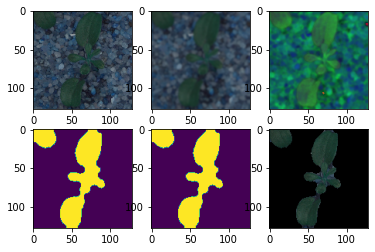

In [17]:
#Extracting the portion where th plant is located, and masking the remaining portion of the image
new_train = []
sets = []; getEx = True
for i in train1:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    new_train.append(new)
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
new_train = np.asarray(new_train)


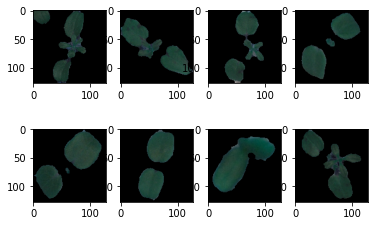

In [18]:
#  Displaying sample of Cleaned Images
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(new_train[i])

In [19]:
#Shape of the image after preprocessing
new_train.shape

(4750, 128, 128, 3)

C. Write a function that will select n random images and display images along with its species. [4 Marks]

Hint: If input for function is 5, it should print 5 random images along with its labels

In [20]:
import random
multiple=glob.glob('/content/drive/MyDrive/plant-seedlings-classification/train/*/*.png')
label=os.listdir('/content/drive/MyDrive/plant-seedlings-classification/train/')
def plotImages2(input):
   for i in range(1,input):
      r = random.sample(multiple, input)
      l=random.sample(label,input)
      plt.figure(figsize=(5,5))
      plt.imshow(cv2.imread(r[i])); plt.axis('off')
      plt.title(l[i])
    

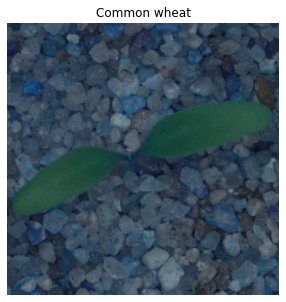

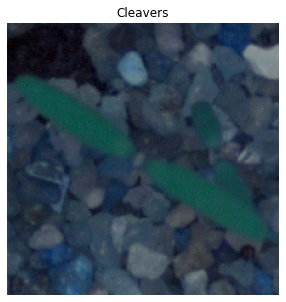

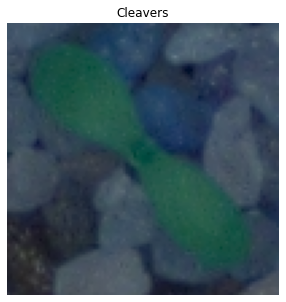

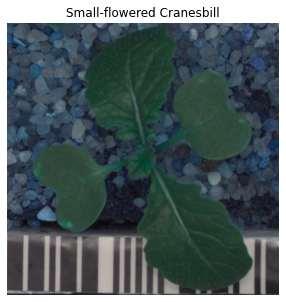

In [21]:
plotImages2(5)

2.Data preprocessing [8 Marks]

A.Create X & Y from the DataFrame. [2 Marks]

In [22]:
X=train_df.drop(['species'],axis=1) 
y=train_df[['species']]

In [23]:
X.shape

(4750, 3)

B. Encode labels of the images. [2 Marks]


In [24]:
#Label encoding of the target variable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_le= le.fit_transform(y)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print('labels of species:',y_le)

labels of species: [2 2 2 ... 7 7 7]


In [26]:
y_le

array([2, 2, 2, ..., 7, 7, 7])

C. Unify shape of all the images. [2 Marks

Already all the images shapes are changed to (128,128)   It is available in Part-A

In [27]:
X=np.asarray(new_train)

In [28]:
X.shape

(4750, 128, 128, 3)

D.Normalise all the images. [2 Marks

In [29]:
X=X/255
print(X.max())
print(X.min())

1.0
0.0


In [30]:
X.shape

(4750, 128, 128, 3)

3. Model training [10 Marks]
Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.






A. Split the data into train and test data. [2 Marks]

In [31]:
#Convert target varible into categorical before feeding into the neural network
from tensorflow.keras.utils import to_categorical
y = to_categorical(y_le, num_classes=12)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state=10)

In [33]:
print('shape of the X_train:',X_train.shape)
print('shape of the y_train:',y_train.shape)
print('shape of the X_test:',X_test.shape)
print('shape of the y_test:',y_test.shape)

shape of the X_train: (3800, 128, 128, 3)
shape of the y_train: (3800, 12)
shape of the X_test: (950, 128, 128, 3)
shape of the y_test: (950, 12)


In [34]:
print(y_train.shape)
print(y_test.shape)

(3800, 12)
(950, 12)


B. Create new CNN architecture to train the model. [4 Marks]

In [35]:
#Creating data generator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True  
    )  
datagen.fit(X_train)

In [36]:
#Creating CNN Model with different layer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128,3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))


model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))


model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 64)       256       
 hNormalization)                                                 
                                                        

C. Train the model on train data and validate on test data. [2 Marks]

In [37]:
#Specify L0ss and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('plants_cnn.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [39]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=(X_test, y_test),callbacks = [model_checkpoint])  

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 2.2965 - accuracy: 0.3371
Epoch 1: val_accuracy improved from -inf to 0.15474, saving model to plants_cnn.h5
60/60 [==============================] - 37s 366ms/step - loss: 2.2965 - accuracy: 0.3371 - val_loss: 8.5593 - val_accuracy: 0.1547
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 1.5111 - accuracy: 0.5163
Epoch 2: val_accuracy did not improve from 0.15474
60/60 [==============================] - 19s 309ms/step - loss: 1.5111 - accuracy: 0.5163 - val_loss: 16.0350 - val_accuracy: 0.0558
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 1.2249 - accuracy: 0.6039
Epoch 3: val_accuracy did not improve from 0.15474
60/60 [==============================] - 20s 325ms/step - loss: 1.2249 - accuracy: 0.6039 - val_loss: 22.9130 - val_accuracy: 0.0558
Epoch 4/50
60/60 [==============================] - ETA: 0s - loss: 1.0569 - accuracy: 0.6532
Epoch 4: val_accuracy did not improve fro

The created model gave good performance on training as well as testing images.

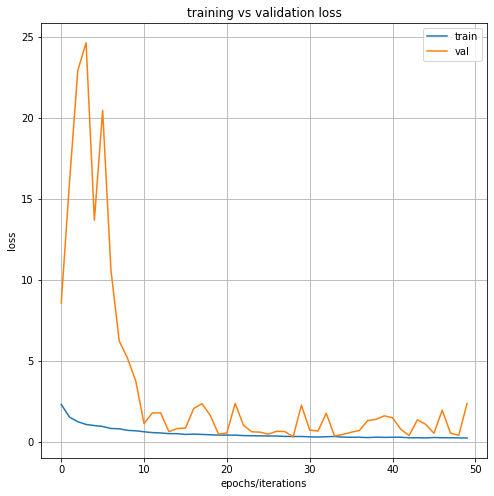

In [42]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
ep=range(50)
plt.figure(1,figsize=(8,8))
plt.plot(ep,train_loss)
plt.plot(ep,val_loss)
plt.xlabel('epochs/iterations')
plt.ylabel('loss')
plt.title('training vs validation loss')
plt.grid(True)
plt.legend(['train','val'])

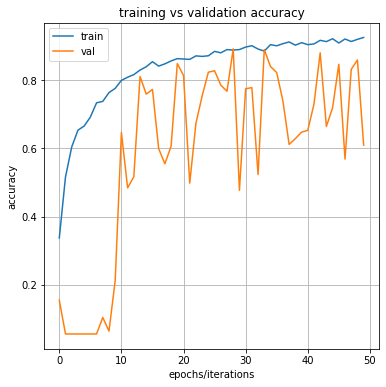

In [44]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
ep=range(50)
plt.figure(1,figsize=(6,6))
plt.plot(ep,train_acc)
plt.plot(ep,val_acc)
plt.xlabel('epochs/iterations')
plt.ylabel('accuracy')
plt.title('training vs validation accuracy')
plt.grid(True)
plt.legend(['train','val'])

Initial iterations model gave good training accuracy but it performs bad on testing.Later it performs better on testing also.

D. Select a random image and print actual label and predicted label for the same. [2 Marks]

(128, 128, 3)
After expand_dims: (1, 128, 128, 3)
[1.50398819e-05 9.71820291e-10 3.94210292e-06 5.05537514e-07
 7.88307375e-08 1.53420302e-07 9.93225157e-01 1.12979066e-07
 6.39187931e-07 4.00782030e-09 6.75427169e-03 1.77041803e-09]
prediction for test image: 6
label for original image: 6


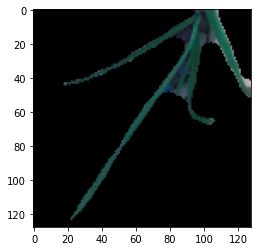

In [49]:
test_image = X_test[53]
plt.imshow(test_image)
# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)
# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255.0
#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))
#Predict the result of the test image
result = model.predict(test_image)
 
print(result[0])

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])
print('prediction for test image:',predicted_index)
print('label for original image:',np.argmax(y_test[53]))

#PART- B

1.Import and Understand the data [5 Marks



A.Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]

Hint: It can be imported from tflearn.datasets. If tflearn is not installed, 

install it.It can be loaded using: x, y = oxflower17.load_data()

In [ ]:
import tensorflow as tf

In [ ]:
pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 32.6 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=1b05ad25896888668dadd688502077bb41d9182f4ce18e424e540f770f731b24
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [ ]:
import tflearn

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#Loading the data
X,y=tflearn.datasets.oxflower17.load_data()

B.Print Number of images and shape of the images. [1 Marks

In [ ]:
print('No. of images:', X.shape[0])
print('shape of the image:',X.shape[1:])

No. of images: 1360
shape of the image: (224, 224, 3)


C.Print count of each class from y. [2 Marks

In [ ]:
import pandas as pd
y_df=pd.DataFrame(y)
y_df.value_counts()

0     80
9     80
15    80
14    80
13    80
12    80
11    80
10    80
8     80
1     80
7     80
6     80
5     80
4     80
3     80
2     80
16    80
dtype: int64

In [ ]:
print("The number of classes in this dataset are:",y_df.nunique())

The number of classes in this dataset are: 0    17
dtype: int64


2.Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks

A.Display 5 random images. [1 Marks]

label for each of the below image: 0
label for each of the below image: 12
label for each of the below image: 13
label for each of the below image: 9
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5
label for each of the below image: 9
label for each of the below image: 9


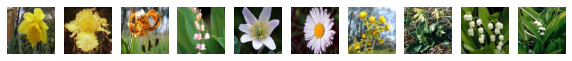

In [ ]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X[i])
    plt.axis('off')
    #print('label for each of the below image: %s' % (np.argmax(y_train[0:29][i])))
    print("label for each of the below image: {}".format(y[i]))
plt.show()

B.Select any image from the dataset and assign it to a variable. [1 Marks]

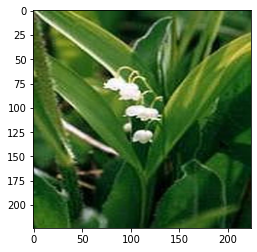

In [ ]:
#selecting the image and assign it to img variable
img=X[9]
plt.imshow(img)

In [ ]:
#Another way of selecting the image
def plot_sample(X,y,index):
  plt.figure(figsize=(10,6))
  plt.imshow(X[index])
  plt.xlabel(y[index])

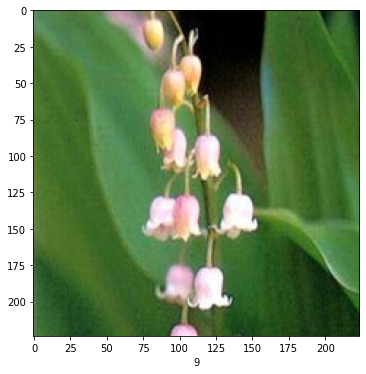

In [ ]:
plot_sample(X,y,3)

Label: 11


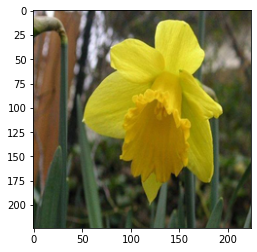

In [ ]:
#selecting the image and assign it to variable
print("Label: {}".format(y[80]))
plt.imshow(X[80], cmap='gray')
image = next(iter(X))
plt.imshow(image)


C.Transform the image into grayscale format and display the same. [3 Marks]

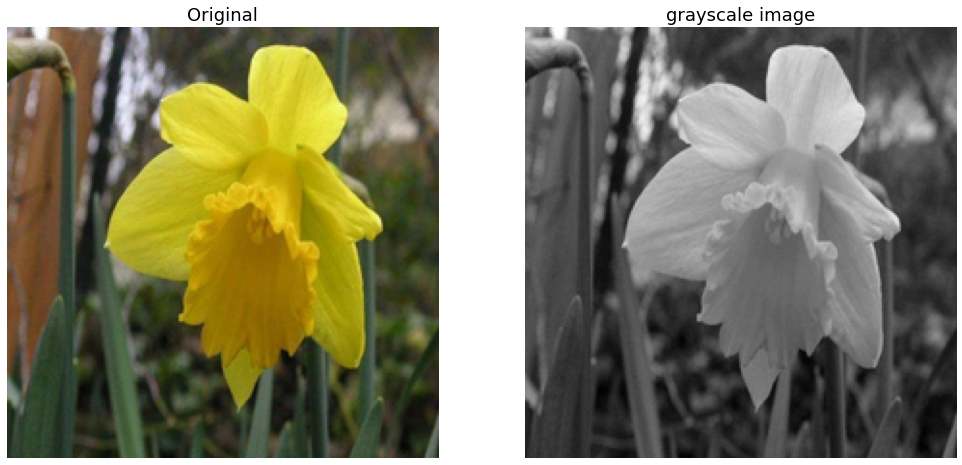

In [ ]:
#Converting selected image in the above step to gray scale image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
    
gray = rgb2gray(image)
fig, ax = plt.subplots(1,2, figsize = (17,10))
ax[0].imshow(image)
ax[0].set_title(f'Original', fontsize = 18)

ax[1].imshow(gray,cmap = plt.get_cmap('gray'))
ax[1].set_title(f'grayscale image', fontsize = 18)
[axi.set_axis_off() for axi in ax.ravel()];

D.Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks

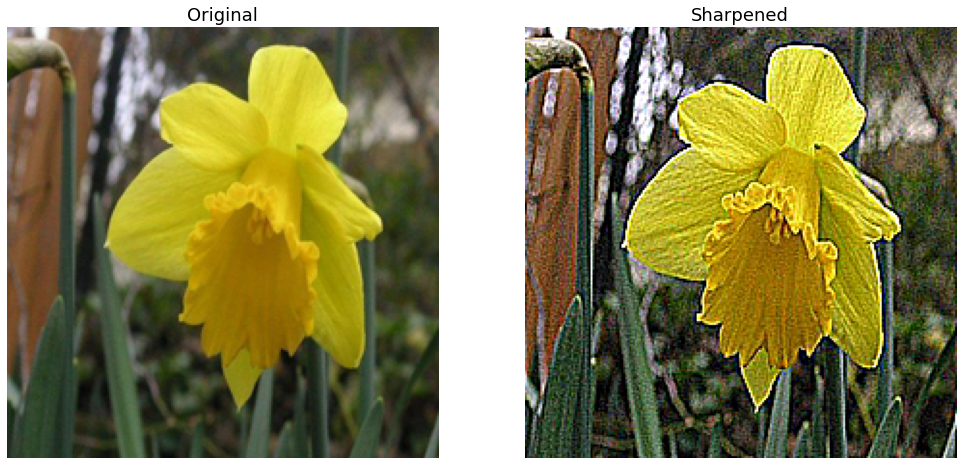

In [ ]:
import cv2
import numpy as np
fig, ax = plt.subplots(1,2, figsize = (17,10))
ax[0].imshow(image)
ax[0].set_title(f'Original', fontsize = 18)
# Create our shapening kernel, it must equal to one eventually
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
# applying the sharpening kernel to the input image & displaying it.
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
ax[1].imshow(sharpened)
ax[1].set_title(f'Sharpened', fontsize = 18)
[axi.set_axis_off() for axi in ax.ravel()];

E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]

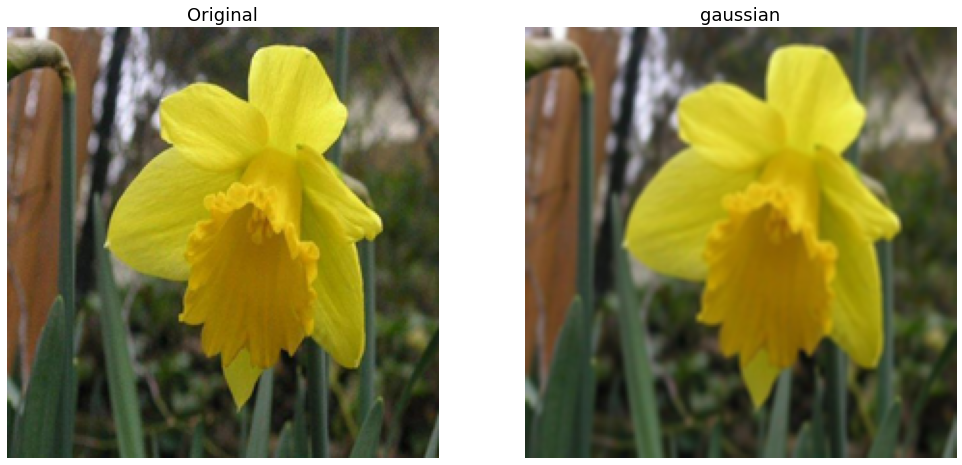

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (17,10))
ax[0].imshow(image)
ax[0].set_title(f'Original', fontsize = 18)
kernel_blurring   = np.array([[1/16,2/16,1/16], 
                              [2/16, 4/16,2/16],
                              [1/16,2/16,1/16]])
gaussian = cv2.blur(image, (3, 3), 0)
ax[1].imshow(gaussian)
ax[1].set_title(f'gaussian', fontsize = 18)
[axi.set_axis_off() for axi in ax.ravel()];
 

F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]

Text(0.5, 1.0, 'gray')

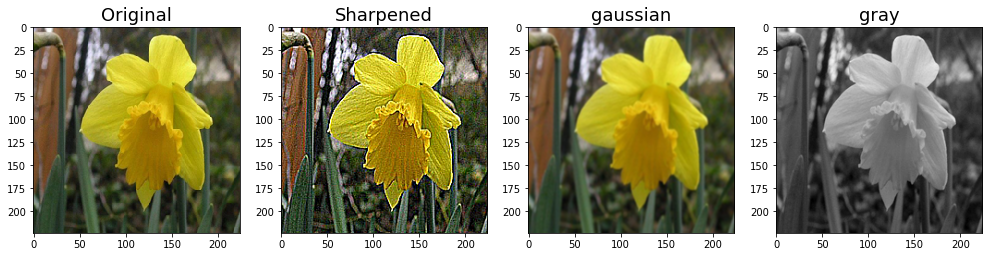

In [ ]:
fig, ax = plt.subplots(1,4, figsize = (17,10))
ax[0].imshow(image,interpolation='none')
ax[0].set_title(f'Original', fontsize = 18)


sharpened = cv2.filter2D(image, -1, kernel_sharpening)
ax[1].imshow(sharpened)
ax[1].set_title(f'Sharpened', fontsize = 18)


gaussian = cv2.GaussianBlur(image, (3, 3), 0)
ax[2].imshow(gaussian)
ax[2].set_title(f'gaussian', fontsize = 18)

gray = rgb2gray(image)
ax[3].imshow(gray, cmap = plt.get_cmap('gray'))
ax[3].set_title(f'gray', fontsize = 18)


3. Model training and Tuning: [15 Marks]

A. Split the data into train and test with 80:20 proportion. [2 Marks]




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle =True)

In [ ]:
#converting train and test data in to single array form 
#used to apply for neural networks and supervised learning
nsamples, nx, ny,w = X_train.shape
X_train1 = X_train.reshape((nsamples,nx*ny*w))
nsamples, nx, ny,w = X_test.shape
X_test1 = X_test.reshape((nsamples,nx*ny*w))

In [ ]:
print('training shape:',X_train1.shape)
print('test image shape:',X_test1.shape)

training shape: (1088, 150528)
test image shape: (272, 150528)


B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]


In [ ]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C= 1, kernel='linear', gamma= .1)
svc_model.fit(X_train1, y_train)
prediction = svc_model .predict(X_test1)

In [ ]:
# check the accuracy on the training set
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
print('model accuracy:',svc_model.score(X_test1, y_test))

model accuracy: 0.5220588235294118


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred =svc_model.predict(X_test1)
cmatrix = confusion_matrix(y_pred, y_test)
print(cmatrix)

[[10  0  0  0  3  2  2  0  0  0  0  0  0  0  2  0  1]
 [ 0  7  1  0  0  0  0  3  0  3  0  2  0  1  3  1  0]
 [ 0  1 10  1  0  1  0  5  2  1  0  2  0  0  0  0  0]
 [ 2  0  0  4  1  0  0  0  0  0  0  0  0  1  0  0  1]
 [ 1  0  0  2  4  1  0  0  0  0  0  0  0  2  0  0  0]
 [ 1  2  0  0  1  6  1  0  0  3  0  0  0  3  1  0  0]
 [ 0  0  0  1  2  1  7  0  0  0  0  0  0  0  4  0  1]
 [ 0  0  0  0  0  0  0  7  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  1  1  0  0  0  1  0]
 [ 0  2  1  0  0  0  0  1  0 10  2  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  3  0 16  3  1  0  0  4  0]
 [ 0  0  1  0  0  0  0  0  1  1  0  9  2  0  0  3  0]
 [ 0  1  0  0  0  0  0  1  0  0  0  2 10  2  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  1  0 11  0  2  0]
 [ 3  0  0  2  1  5  1  0  0  0  0  0  0  3  3  0  0]
 [ 0  1  0  0  0  0  0  2  1  0  0  1  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13]]


In [ ]:
#Before applying into neural network model convert y into categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=17)
y_test = to_categorical(y_test, num_classes=17)

C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras import regularizers, optimizers
def NN_model():
  model=Sequential()
  model.add(Dense(64,input_shape=(150528,), activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dense(64,activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dense(32,activation='relu', kernel_initializer='he_normal'))#Hiddenlayer
  model.add(BatchNormalization())
  model.add(Dense(32,activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dense(17,activation='softmax',kernel_regularizer=regularizers.l2(0.001)))#output layer
  return model
  

In [ ]:
model=NN_model()

In [ ]:
batch_size = 100
ntrain = len(X_train)
nval = len(X_test)

In [ ]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
#compile model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#fit the model
out1=model.fit(X_train1, y_train, epochs=30, batch_size=32, verbose= 1,validation_data=(X_test1, y_test))

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - 1s 923us/sample - loss: 3.0333 - acc: 0.0919 - val_loss: 9.3274 - val_acc: 0.0625
Epoch 2/30


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 1s 578us/sample - loss: 2.4814 - acc: 0.2169 - val_loss: 4.5094 - val_acc: 0.1250
Epoch 3/30
1088/1088 [==============================] - 1s 571us/sample - loss: 2.1792 - acc: 0.3199 - val_loss: 3.1203 - val_acc: 0.1544
Epoch 4/30
1088/1088 [==============================] - 1s 569us/sample - loss: 1.9464 - acc: 0.4072 - val_loss: 2.6587 - val_acc: 0.2243
Epoch 5/30
1088/1088 [==============================] - 1s 563us/sample - loss: 1.7283 - acc: 0.5083 - val_loss: 2.2608 - val_acc: 0.2757
Epoch 6/30
1088/1088 [==============================] - 1s 564us/sample - loss: 1.5170 - acc: 0.5818 - val_loss: 2.1576 - val_acc: 0.3125
Epoch 7/30
1088/1088 [==============================] - 1s 564us/sample - loss: 1.3163 - acc: 0.6544 - val_loss: 2.3677 - val_acc: 0.2978
Epoch 8/30
1088/1088 [==============================] - 1s 564us/sample - loss: 1.1843 - acc: 0.6893 - val_loss: 2.1476 - val_acc: 0.3309
Epoch 9/30
1088/1088 [=======================

From the above model it is observed that training accuracy is good but testing accuracy is reduces. 

In [ ]:
result=model.evaluate(X_test1, y_test)
print(model.metrics_names)
print(result)

['loss', 'acc']
[2.448549466974595, 0.40441176]


In [ ]:
pred = model.predict(X_test1)
pred.shape
predict_classes=np.argmax(pred,axis=1)
predict_classes

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([14,  0,  7, 14,  6, 13,  9, 11,  9,  5, 12,  9, 11, 15, 14, 14, 12,
       15,  2,  5,  9,  5,  8, 10, 10,  6,  5,  6,  5,  5, 11, 13,  5, 16,
        6,  6, 10,  8,  1,  9,  9,  9,  5, 15,  8,  5,  5,  0, 10,  5, 15,
        9, 14,  2,  2,  1,  2,  4, 11, 10,  1,  7, 15, 16, 11,  1, 14, 11,
       15, 10,  8, 10,  2,  3,  6,  4,  9, 15,  3,  9, 13,  6, 10, 10, 11,
        8,  9,  7,  0,  0, 13, 12, 14,  2,  4, 15, 10,  7,  9,  9, 12,  5,
       11, 10,  6, 13, 16,  3, 10, 14, 10,  5,  0,  8, 13, 10,  0, 16,  1,
       10, 14,  2,  5, 10,  7,  8, 10, 13, 14,  9, 10, 15,  5,  0,  6,  8,
        9, 16, 10, 16, 10, 10,  9, 14, 14, 15, 14, 10, 11,  7,  1, 16,  0,
       15,  5, 14,  0, 10,  4,  0,  0,  1,  2,  2,  0,  5, 14,  6,  0,  5,
        5,  9,  7,  8,  8, 16, 16,  5, 11,  0, 16,  8, 11,  2, 12,  0, 15,
       14, 16,  2, 11, 10,  9, 16,  5, 15, 10,  5, 10, 14,  5, 15, 16, 11,
        5, 14, 14,  6, 16, 10, 16, 10,  2,  9,  9, 11,  1, 13, 12, 15,  2,
        9, 13,  6, 15, 14

In [ ]:
pred[53]
#predicting the labels for random image
print('predicted label for image:', np.argmax(pred[53]))
print('label for test image:',np.argmax(y_test[53]))

predicted label for image: 2
label for test image: 2


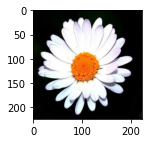

Preiction for above image:  2


In [ ]:
#predicting the label for test image
plt.figure(figsize=(2,2))
plt.imshow(X_test1[53].reshape(224,224,3))
plt.show()
pred = model.predict(X_test1)
print("Preiction for above image: ", np.argmax(pred[53]))

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(X_test1)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 
cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)


[[ 6  0  0  1  0  0  2  0  0  2  0  0  0  0  5  0  1]
 [ 0  1  0  0  0  4  0  0  0  3  4  1  0  0  1  0  0]
 [ 0  2  8  0  0  0  0  1  1  0  1  0  0  0  0  0  0]
 [ 1  0  0  2  0  1  3  0  0  0  0  0  0  0  2  0  1]
 [ 4  0  0  0  2  1  4  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  1  4  2  0  0  3  0  0  0  0  5  1  0]
 [ 1  0  0  0  0  1  7  0  0  0  0  0  0  0  2  0  0]
 [ 1  1  1  0  0  4  0  7  0  1  1  3  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  7  0  5  0  0  1  0  2  0]
 [ 0  3  0  0  0  2  0  0  0 10  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  3  9  1  1  0  0  3  0]
 [ 0  0  3  0  0  2  0  0  1  1  5  6  0  0  0  3  0]
 [ 0  1  0  0  0  1  0  0  1  0  1  1  7  0  1  0  0]
 [ 0  0  0  0  1  4  0  0  0  2  2  0  0  7  4  2  1]
 [ 3  0  0  0  0  2  0  0  0  3  1  0  0  0  5  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  5  3  0  0  0  8  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0 14]]


To improve the accuracy of the given image dataset applied CNN to the data.

In [ ]:
#implement train and validation generators for CNN and NN Execution
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (rescale=1./255,shear_range=0.2,zoom_range=0.2, rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)
val_datagen = ImageDataGenerator (rescale=1./255,featurewise_std_normalization=True)
train_datagen.fit(X_train)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_test, y_test, batch_size=32)

D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224,3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))


model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))


model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=3))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(17, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_14 (Bat  (None, 222, 222, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_15 (Bat  (None, 110, 110, 64)     256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
batch_size = 64
ntrain = len(X_train)
nval = len(X_test)

In [ ]:
# There are 3823 training images and 500 test images in total
m3=model.fit_generator(train_generator,
                         steps_per_epoch = ntrain // batch_size,
                         epochs = 30,
                         validation_data = val_generator,
                         validation_steps = nval // batch_size)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


17/17 [==============================] - 8s 428ms/step - batch: 8.0000 - size: 32.0000 - loss: 1.0460 - acc: 0.6673 - val_loss: 1.8669 - val_acc: 0.4141
Epoch 2/30
17/17 [==============================] - 7s 421ms/step - batch: 8.0000 - size: 32.0000 - loss: 1.0201 - acc: 0.6691 - val_loss: 3.7589 - val_acc: 0.2422
Epoch 3/30
17/17 [==============================] - 7s 424ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.8401 - acc: 0.7114 - val_loss: 1.4307 - val_acc: 0.5547
Epoch 4/30
17/17 [==============================] - 7s 430ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.9600 - acc: 0.6728 - val_loss: 1.8670 - val_acc: 0.5078
Epoch 5/30
17/17 [==============================] - 7s 423ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.8380 - acc: 0.7243 - val_loss: 1.1255 - val_acc: 0.6641
Epoch 6/30
17/17 [==============================] - 7s 423ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.8330 - acc: 0.7077 - val_loss: 2.0888 - val_acc: 0.4297
Epoch 7/30
17/17 [=========

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('flowers_cnn.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
m3=model.fit_generator(train_generator,
                         steps_per_epoch = ntrain // batch_size,
                         epochs = 50,
                         validation_data = val_generator,
                         validation_steps = nval // batch_size,callbacks = [model_checkpoint])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.7044 - acc: 0.7610

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


17/17 [==============================] - 9s 512ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.7044 - acc: 0.7610 - val_loss: 1.3319 - val_acc: 0.6328
Epoch 2/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6714 - acc: 0.7592

17/17 [==============================] - 7s 431ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6714 - acc: 0.7592 - val_loss: 2.4695 - val_acc: 0.4766
Epoch 3/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6236 - acc: 0.7868

17/17 [==============================] - 7s 430ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6236 - acc: 0.7868 - val_loss: 2.5147 - val_acc: 0.4297
Epoch 4/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.7496 - acc: 0.7482

17/17 [==============================] - 7s 436ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.7496 - acc: 0.7482 - val_loss: 2.2404 - val_acc: 0.5312
Epoch 5/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6104 - acc: 0.7812

17/17 [==============================] - 7s 432ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6104 - acc: 0.7812 - val_loss: 0.7110 - val_acc: 0.7969
Epoch 6/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6198 - acc: 0.7941

17/17 [==============================] - 7s 432ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6198 - acc: 0.7941 - val_loss: 1.2001 - val_acc: 0.6094
Epoch 7/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5866 - acc: 0.8015

17/17 [==============================] - 7s 439ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5866 - acc: 0.8015 - val_loss: 3.0685 - val_acc: 0.4219
Epoch 8/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6397 - acc: 0.8051

17/17 [==============================] - 7s 430ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6397 - acc: 0.8051 - val_loss: 1.0105 - val_acc: 0.6719
Epoch 9/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5629 - acc: 0.8070

17/17 [==============================] - 7s 439ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5629 - acc: 0.8070 - val_loss: 0.9165 - val_acc: 0.7266
Epoch 10/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6355 - acc: 0.7831

17/17 [==============================] - 7s 437ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6355 - acc: 0.7831 - val_loss: 0.9961 - val_acc: 0.6875
Epoch 11/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6013 - acc: 0.7923

17/17 [==============================] - 7s 430ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6013 - acc: 0.7923 - val_loss: 1.9008 - val_acc: 0.5234
Epoch 12/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6155 - acc: 0.8015

17/17 [==============================] - 7s 431ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6155 - acc: 0.8015 - val_loss: 0.7733 - val_acc: 0.7812
Epoch 13/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5835 - acc: 0.7996

17/17 [==============================] - 8s 478ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5835 - acc: 0.7996 - val_loss: 0.7483 - val_acc: 0.7969
Epoch 14/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.7275 - acc: 0.7574

17/17 [==============================] - 8s 478ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.7275 - acc: 0.7574 - val_loss: 2.5639 - val_acc: 0.5312
Epoch 15/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5651 - acc: 0.8125

17/17 [==============================] - 7s 434ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5651 - acc: 0.8125 - val_loss: 1.7452 - val_acc: 0.5859
Epoch 16/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6000 - acc: 0.7886

17/17 [==============================] - 7s 423ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6000 - acc: 0.7886 - val_loss: 2.1627 - val_acc: 0.4922
Epoch 17/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5766 - acc: 0.7960

17/17 [==============================] - 7s 436ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5766 - acc: 0.7960 - val_loss: 0.9787 - val_acc: 0.7109
Epoch 18/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6569 - acc: 0.7665

17/17 [==============================] - 7s 429ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6569 - acc: 0.7665 - val_loss: 1.3135 - val_acc: 0.6719
Epoch 19/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5074 - acc: 0.8290

17/17 [==============================] - 7s 427ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5074 - acc: 0.8290 - val_loss: 1.1972 - val_acc: 0.6875
Epoch 20/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6686 - acc: 0.7849

17/17 [==============================] - 7s 433ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6686 - acc: 0.7849 - val_loss: 1.1823 - val_acc: 0.6172
Epoch 21/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6223 - acc: 0.7794

17/17 [==============================] - 7s 426ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6223 - acc: 0.7794 - val_loss: 2.2075 - val_acc: 0.4766
Epoch 22/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5552 - acc: 0.8070

17/17 [==============================] - 7s 429ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5552 - acc: 0.8070 - val_loss: 1.6445 - val_acc: 0.5391
Epoch 23/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4399 - acc: 0.8401

17/17 [==============================] - 7s 424ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4399 - acc: 0.8401 - val_loss: 1.7440 - val_acc: 0.5391
Epoch 24/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5703 - acc: 0.8107

17/17 [==============================] - 7s 424ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5703 - acc: 0.8107 - val_loss: 1.0704 - val_acc: 0.7109
Epoch 25/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5211 - acc: 0.8382

17/17 [==============================] - 7s 425ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5211 - acc: 0.8382 - val_loss: 1.3886 - val_acc: 0.6406
Epoch 26/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5680 - acc: 0.8199

17/17 [==============================] - 7s 452ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5680 - acc: 0.8199 - val_loss: 1.4843 - val_acc: 0.6250
Epoch 27/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5350 - acc: 0.8125

17/17 [==============================] - 8s 472ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5350 - acc: 0.8125 - val_loss: 1.0382 - val_acc: 0.7031
Epoch 28/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5335 - acc: 0.8070

17/17 [==============================] - 7s 426ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5335 - acc: 0.8070 - val_loss: 1.1679 - val_acc: 0.7031
Epoch 29/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5119 - acc: 0.8235

17/17 [==============================] - 7s 436ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5119 - acc: 0.8235 - val_loss: 1.2174 - val_acc: 0.6328
Epoch 30/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5667 - acc: 0.8143

17/17 [==============================] - 7s 425ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5667 - acc: 0.8143 - val_loss: 3.0599 - val_acc: 0.4141
Epoch 31/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5010 - acc: 0.8272

17/17 [==============================] - 7s 426ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5010 - acc: 0.8272 - val_loss: 1.6544 - val_acc: 0.5156
Epoch 32/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5172 - acc: 0.8235

17/17 [==============================] - 7s 429ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5172 - acc: 0.8235 - val_loss: 1.6411 - val_acc: 0.5938
Epoch 33/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4831 - acc: 0.8401

17/17 [==============================] - 7s 429ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4831 - acc: 0.8401 - val_loss: 1.5405 - val_acc: 0.5859
Epoch 34/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5370 - acc: 0.7996

17/17 [==============================] - 7s 425ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5370 - acc: 0.7996 - val_loss: 2.5582 - val_acc: 0.4844
Epoch 35/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4433 - acc: 0.8474

17/17 [==============================] - 7s 429ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4433 - acc: 0.8474 - val_loss: 1.2279 - val_acc: 0.6406
Epoch 36/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5606 - acc: 0.8107

17/17 [==============================] - 7s 421ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5606 - acc: 0.8107 - val_loss: 1.0577 - val_acc: 0.6797
Epoch 37/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4648 - acc: 0.8309

17/17 [==============================] - 7s 425ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4648 - acc: 0.8309 - val_loss: 1.0157 - val_acc: 0.7109
Epoch 38/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.6014 - acc: 0.8107

17/17 [==============================] - 7s 420ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.6014 - acc: 0.8107 - val_loss: 1.1954 - val_acc: 0.6641
Epoch 39/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4679 - acc: 0.8346

17/17 [==============================] - 7s 422ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4679 - acc: 0.8346 - val_loss: 0.8431 - val_acc: 0.7578
Epoch 40/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4448 - acc: 0.8456

17/17 [==============================] - 7s 424ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4448 - acc: 0.8456 - val_loss: 1.0559 - val_acc: 0.6953
Epoch 41/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.3975 - acc: 0.8805

17/17 [==============================] - 7s 421ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.3975 - acc: 0.8805 - val_loss: 1.7639 - val_acc: 0.6172
Epoch 42/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.5539 - acc: 0.8125

17/17 [==============================] - 7s 428ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.5539 - acc: 0.8125 - val_loss: 2.0138 - val_acc: 0.5703
Epoch 43/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4680 - acc: 0.8401

17/17 [==============================] - 7s 422ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4680 - acc: 0.8401 - val_loss: 0.7556 - val_acc: 0.7969
Epoch 44/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4624 - acc: 0.8401

17/17 [==============================] - 7s 424ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4624 - acc: 0.8401 - val_loss: 0.8694 - val_acc: 0.7266
Epoch 45/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4668 - acc: 0.8364

17/17 [==============================] - 7s 422ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4668 - acc: 0.8364 - val_loss: 1.2202 - val_acc: 0.6641
Epoch 46/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4651 - acc: 0.8456

17/17 [==============================] - 7s 422ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4651 - acc: 0.8456 - val_loss: 1.2305 - val_acc: 0.6953
Epoch 47/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4054 - acc: 0.8511

17/17 [==============================] - 7s 424ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4054 - acc: 0.8511 - val_loss: 0.8748 - val_acc: 0.7812
Epoch 48/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4910 - acc: 0.8235

17/17 [==============================] - 7s 420ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4910 - acc: 0.8235 - val_loss: 1.0666 - val_acc: 0.6797
Epoch 49/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4131 - acc: 0.8548

17/17 [==============================] - 7s 425ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4131 - acc: 0.8548 - val_loss: 0.8832 - val_acc: 0.7500
Epoch 50/50
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 32.0000 - loss: 0.4558 - acc: 0.8529

17/17 [==============================] - 7s 421ms/step - batch: 8.0000 - size: 32.0000 - loss: 0.4558 - acc: 0.8529 - val_loss: 0.7154 - val_acc: 0.7969


From the basic CNN model it is observed that training and testing accuracy are good.

CNN model gave best accuracy compared to supervised Learning and Neural network model.

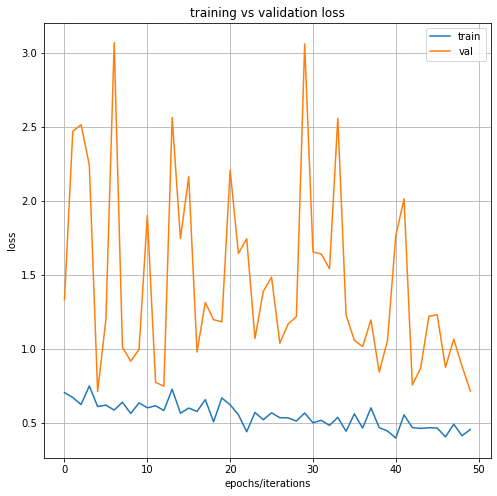

In [ ]:
train_loss=m3.history['loss']
val_loss=m3.history['val_loss']
ep=range(50)
plt.figure(1,figsize=(8,8))
plt.plot(ep,train_loss)
plt.plot(ep,val_loss)
plt.xlabel('epochs/iterations')
plt.ylabel('loss')
plt.title('training vs validation loss')
plt.grid(True)
plt.legend(['train','val'])

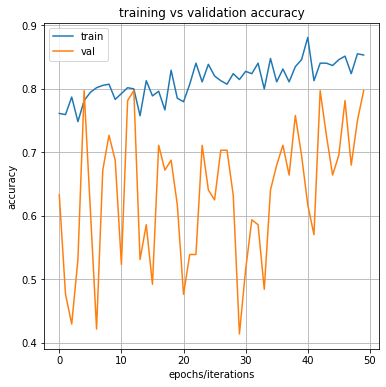

In [ ]:
train_acc=m3.history['acc']
val_acc=m3.history['val_acc']
ep=range(50)
plt.figure(1,figsize=(6,6))
plt.plot(ep,train_acc)
plt.plot(ep,val_acc)
plt.xlabel('epochs/iterations')
plt.ylabel('accuracy')
plt.title('training vs validation accuracy')
plt.grid(True)
plt.legend(['train','val'])

(224, 224, 3)
After expand_dims: (1, 224, 224, 3)
[2.09406364e-11 7.55722624e-07 9.99985814e-01 6.60855832e-12
 2.73429456e-12 6.52335824e-13 2.41538126e-13 3.35158688e-07
 5.34199422e-08 2.15054274e-06 5.48750368e-12 9.38968299e-08
 2.24499495e-08 1.07995575e-05 2.01904010e-12 2.18322693e-09
 3.32875505e-10]
prediction for test image: 2
label for original image: 2


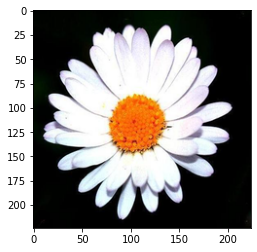

In [ ]:
import cv2
import matplotlib.pyplot as plt
test_image = X_test[53]
plt.imshow(test_image)
# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)
# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255.0
#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))
#Predict the result of the test image
result = model.predict(test_image)
 
print(result[0])

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])
print('prediction for test image:',predicted_index)
print('label for original image:',np.argmax(y_test[53]))

Out of 3 models(supervised Learning,Neural Network and CNN model) CNN performs better in training and  testing.

Finally it is observed that CNN is best performing model.


E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After expand_dims: (1, 224, 224, 3)


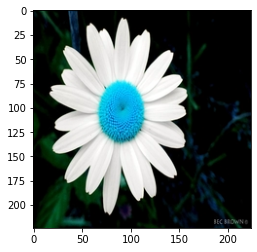

In [ ]:
prediction=cv2.imread('/content/drive/MyDrive/Prediction+-+Flower.jpg')
plt.imshow(prediction)
predict_image = np.expand_dims(prediction, axis = 0)
predict_image =predict_image*1/255.0
print('After expand_dims: '+ str(predict_image.shape))

In [ ]:
result = model.predict(predict_image)
 
print(result[0])

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])
print('predicted the label of given image',predicted_index)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
predicted the label of given image 13
